In [1]:
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pickle
import PIL
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import Dataset
%matplotlib inline
import sys
import re
import pathlib
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from tqdm.auto import tqdm, trange
tqdm.pandas(desc='Progress')

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
all=pd.read_csv("/content/drive/MyDrive/550FinalProject/EN_data.csv")
all

,Unnamed: 0,Class Index,Title,Description
0,0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...,...
127595,7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
127596,7596,2,Void is filled with Clement,With the supply of attractive pitching options...
127597,7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
127598,7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [4]:
all["data"]=all["Title"]+" "+all["Description"]
all

,Unnamed: 0,Class Index,Title,Description,data
0,0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
...,...,...,...,...,...
127595,7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,Around the world Ukrainian presidential candid...
127596,7596,2,Void is filled with Clement,With the supply of attractive pitching options...,Void is filled with Clement With the supply of...
127597,7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,Martinez leaves bitter Like Roger Clemens did ...
127598,7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,5 of arthritis patients in Singapore take Bext...


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
def tweet_clean(text):
        """Very basic text cleaning. This function can be built upon for
           better preprocessing
        """
        text = re.sub(r'[\s]+', ' ', text) # replace multiple white spaces with single space
        text = re.sub(r'@[A-Za-z0-9]+', ' ', text) # remove @ mentions
        text = re.sub(r'https?:/\/\S+', ' ', text) # remove links
        #text = re.sub(r'\d+', ' ', text) # remove links
        #text = re.sub(r'[。：！？，、“?@#$%^&*+"|/`"~-]', ' ', text)
        # text = re.sub(r'[A-Za-z]', '', text)
        #text = re.sub('[()]', '', text)

        text = re.sub(r'[^A-Za-z]+', ' ', text) # remove non alphanumeric character
        return text.lower().split()
def removal_stopwords(text):
      from nltk.corpus import stopwords
      sw = stopwords.words('english')
      t_sw=" ".join([word for word in text if word not in sw])  
      #print("a" in sw, "the" in sw)
      return t_sw

def preprocess(text):
  return removal_stopwords(tweet_clean(text))

In [7]:
all["preprocessed"]=all["data"].apply(preprocess)

In [8]:
all

,Unnamed: 0,Class Index,Title,Description,data,preprocessed
0,0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...,wall st bears claw back black reuters reuters ...
1,1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyle looks toward commercial aerospace reut...
2,2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economy cloud stocks outlook reuters reute...
3,3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halts oil exports main southern pipeline ...
4,4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new...",oil prices soar time record posing new menace ...
...,...,...,...,...,...,...
127595,7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,Around the world Ukrainian presidential candid...,around world ukrainian presidential candidate ...
127596,7596,2,Void is filled with Clement,With the supply of attractive pitching options...,Void is filled with Clement With the supply of...,void filled clement supply attractive pitching...
127597,7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,Martinez leaves bitter Like Roger Clemens did ...,martinez leaves bitter like roger clemens almo...
127598,7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,5 of arthritis patients in Singapore take Bext...,arthritis patients singapore take bextra celeb...


In [9]:
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]
new_y=to_categorical(all['Class Index'], 5)
new_y=new_y[:,1:]


In [10]:
new_y.shape

(127600, 4)

In [ ]:
X=all['preprocessed']

In [ ]:
X

0         wall st bears claw back black reuters reuters ...
1         carlyle looks toward commercial aerospace reut...
2         oil economy cloud stocks outlook reuters reute...
3         iraq halts oil exports main southern pipeline ...
4         oil prices soar time record posing new menace ...
                                ...                        
127595    around world ukrainian presidential candidate ...
127596    void filled clement supply attractive pitching...
127597    martinez leaves bitter like roger clemens almo...
127598    arthritis patients singapore take bextra celeb...
127599    ebay gets rentals ebay plans buy apartment hom...
Name: preprocessed, Length: 127600, dtype: object

In [ ]:
def split_dataset(X,y, test_size):
    """
    Prepare the training/testing dataset

    Params:

        test_size {float} -- precentage of testing dataset
    Return:
        X_train,X_test,y_train,y_test {tuple} -- split datasets

    """
    
    return train_test_split(X, y, test_size=test_size, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = split_dataset(X,new_y,0.5) #size can be 0.05,0.1,0.2,0.5

In [ ]:
X_train.shape

(63800,)

In [ ]:
X_train

94158     ebay agrees limit racial slurs auction site in...
106445    un says may spotted rwandan troops congo kinsh...
86221     ferguson sure fletcher come good manchester un...
20634     circuit city growth misses estimates new york ...
44443     good news phishing scams net lt gt lt gt milli...
                                ...                        
119879    governor wants fines selling violent games kid...
103694    russians finish dominant federation cup victor...
860       oracle readies crm updates oracle corp plans r...
15795     apple new imac display apple computer quote ch...
121958    us stocks ford forecast gives lift new york re...
Name: preprocessed, Length: 63800, dtype: object

In [ ]:
words_counter = Counter()
for i in X_train:#len(train)
  words_counter.update(w for w in i.split())
words_counter

Counter({'ebay': 237,
         'agrees': 157,
         'limit': 92,
         'racial': 29,
         'slurs': 5,
         'auction': 222,
         'site': 663,
         'internet': 2157,
         'house': 799,
         'inc': 3644,
         'said': 10798,
         'wednesday': 4097,
         'would': 2546,
         'use': 868,
         'us': 7129,
         'city': 1742,
         'officials': 1741,
         'complained': 23,
         'offensive': 317,
         'terms': 201,
         'used': 722,
         'advertise': 5,
         'lawn': 18,
         'jockeys': 6,
         'antiques': 2,
         'un': 1100,
         'says': 2824,
         'may': 2413,
         'spotted': 45,
         'rwandan': 67,
         'troops': 993,
         'congo': 161,
         'kinshasa': 18,
         'reuters': 9202,
         'u': 4611,
         'n': 1879,
         'mission': 335,
         'soldiers': 558,
         'thought': 230,
         'east': 556,
         'vast': 76,
         'central': 585,
         'af

In [ ]:
len(words_counter)

49323

In [ ]:
PAD = 0
UNK = 1
max_vocab_size=60000
def build_vocab(words_counter, max_vocab_size):
  word2idx = {'<PAD>': PAD, '<UNK>': UNK}
  word2idx.update({word:i+2 for i, (word, count) in enumerate(words_counter.most_common(max_vocab_size))})
  idx2word = {idx: word for word, idx in word2idx.items()}
  return word2idx, idx2word
word2idx, idx2word = build_vocab(words_counter, max_vocab_size)

In [ ]:
def vectorize(tokens, word2idx):
  vec = [word2idx.get(token, UNK) for token in tokens]
  return vec

vec=[]
for i in X_train:
  vec.append(vectorize(i.split(),word2idx))
vec

[[1314,
  2009,
  3173,
  7062,
  18200,
  1401,
  412,
  62,
  1401,
  317,
  1314,
  22,
  3,
  17,
  45,
  3173,
  285,
  7062,
  18200,
  6,
  90,
  91,
  8129,
  955,
  1580,
  363,
  18201,
  9365,
  16726,
  26454],
 [197,
  36,
  53,
  5302,
  4033,
  222,
  1960,
  9366,
  4,
  13,
  82,
  905,
  1960,
  3,
  17,
  5302,
  507,
  1361,
  4033,
  510,
  3644,
  476,
  652,
  111,
  16727,
  2354,
  158,
  485,
  222,
  6045,
  1094],
 [3052,
  1713,
  9091,
  570,
  370,
  729,
  37,
  3551,
  88,
  3685,
  5743,
  9091,
  124,
  141,
  1961,
  3078,
  3686,
  2775,
  8312,
  112],
 [2405,
  90,
  186,
  4083,
  1551,
  2,
  27,
  4,
  2405,
  90,
  514,
  22,
  8,
  194,
  122,
  39,
  252,
  253,
  7,
  12289,
  82,
  8,
  7,
  18,
  131,
  54,
  949,
  501,
  557,
  78,
  186,
  9367,
  1551,
  463,
  4680,
  2293,
  2904,
  646,
  525],
 [370,
  76,
  2572,
  5080,
  344,
  8,
  7,
  8,
  7,
  32,
  28,
  3345,
  4557,
  641,
  7389,
  471,
  2572,
  5303,
  289,
  225,
  1

In [ ]:
vec1=[]
for i in X_test:
  vec1.append(vectorize(i.split(),word2idx))

In [ ]:
vec1

[[1681,
  436,
  5372,
  435,
  1746,
  1681,
  436,
  5319,
  3556,
  95,
  25502,
  755,
  15,
  3507,
  216,
  10680,
  8987,
  474,
  260,
  61,
  998,
  4802,
  9590,
  1144],
 [2254,
  673,
  1770,
  158,
  1821,
  1819,
  1961,
  15497,
  99,
  475,
  5324,
  2254,
  862,
  1046,
  2254,
  260,
  10,
  33,
  181,
  2905,
  2509,
  600,
  2928,
  496],
 [2033,
  717,
  1083,
  4923,
  1405,
  6369,
  16,
  385,
  618,
  218,
  1248,
  7834,
  2543,
  7804,
  6369,
  2,
  338,
  4048,
  6472],
 [18873, 798, 14042, 18873, 363, 3706, 1, 1, 1558, 2652, 8427, 14042, 1939],
 [2942,
  2782,
  1740,
  9484,
  64,
  411,
  4938,
  178,
  411,
  1862,
  2551,
  1770,
  581,
  441,
  11051,
  138],
 [4425,
  1557,
  859,
  1969,
  595,
  162,
  1997,
  88,
  226,
  1150,
  85,
  18,
  2054,
  859,
  1915,
  1969,
  103,
  198,
  558,
  458,
  6089,
  3684,
  595],
 [3289,
  176,
  2,
  27,
  1762,
  1762,
  14,
  81,
  6036,
  4513,
  3289,
  2192,
  6904,
  2,
  27,
  90,
  1762,
  57,
  1

In [ ]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

x_train_pad = padding_(vec,120)
x_test_pad = padding_(vec1,120)

In [ ]:
x_train_pad

array([[    0,     0,     0, ...,  9365, 16726, 26454],
       [    0,     0,     0, ...,   222,  6045,  1094],
       [    0,     0,     0, ...,  2775,  8312,   112],
       ...,
       [    0,     0,     0, ...,   263,    75,  2830],
       [    0,     0,     0, ...,  1095,  1132,  1714],
       [    0,     0,     0, ...,  1383,  9700,  1453]])

In [ ]:
x_test_pad

array([[   0,    0,    0, ..., 4802, 9590, 1144],
       [   0,    0,    0, ...,  600, 2928,  496],
       [   0,    0,    0, ...,  338, 4048, 6472],
       ...,
       [   0,    0,    0, ...,  144, 2421, 4431],
       [   0,    0,    0, ..., 1245,   68, 1646],
       [   0,    0,    0, ...,   47, 1791,  485]])

In [ ]:
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

In [ ]:
batch_size = 16

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [ ]:
dataiter = iter(valid_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([16, 120])
Sample input: 
 tensor([[   0,    0,    0,  ..., 6793, 2182,  110],
        [   0,    0,    0,  ..., 7806, 1009,   43],
        [   0,    0,    0,  ..., 6595,  163, 4891],
        ...,
        [   0,    0,    0,  ...,   87,  249,   29],
        [   0,    0,    0,  ...,  249,   23,  408],
        [   0,    0,    0,  ...,  212,  531,  436]])
Sample input: 
 tensor([[0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0]], dtype=torch.uint8)


In [ ]:
embed_size = 300 # how big is each word vector
max_features = len(word2idx) # how many unique words to use (i.e num rows in embedding vector)
maxlen = 120 # max number of words in a question to use
batch_size = 16 # how many samples to process at once
n_epochs = 5 # how many times to iterate over all samples
n_splits = 5 # Number of K-fold Splits
SEED = 10
debug = 0

In [ ]:
class BiLSTM(nn.Module):
    
    def __init__(self):
        super(BiLSTM, self).__init__()
        self.hidden_size = 64
        drp = 0.1
        self.embedding = nn.Embedding(max_features, embed_size)
        #self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        #self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embed_size, self.hidden_size, bidirectional=True, batch_first=True)
        self.linear = nn.Linear(self.hidden_size*4 , 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(drp)
        self.out = nn.Linear(64, 4)
        self.sig=nn.Sigmoid()

    def forward(self, x):
        h_embedding = self.embedding(x)
        h_embedding = torch.squeeze(torch.unsqueeze(h_embedding, 0))
        
        h_lstm, _ = self.lstm(h_embedding)
        avg_pool = torch.mean(h_lstm, 1)
        max_pool, _ = torch.max(h_lstm, 1)
        #print("avg_pool", avg_pool.size())
        #print("max_pool", max_pool.size())
        conc = torch.cat(( avg_pool, max_pool), 1)
        conc = self.relu(self.linear(conc))
        conc = self.dropout(conc)
        out = self.out(conc)
        out=self.sig(out)
        return out

model=BiLSTM().cuda()
print(model)

BiLSTM(
  (embedding): Embedding(49325, 300)
  (lstm): LSTM(300, 64, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=256, out_features=64, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (out): Linear(in_features=64, out_features=4, bias=True)
  (sig): Sigmoid()
)


In [ ]:
#all.to_csv("/content/drive/MyDrive/CN_Glove/cn_data_p.csv",index=False)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9,weight_decay=1e-5)
#optimizer = optim.RMSprop(model.parameters())

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
result=[]
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        outputs=outputs.float()
        labels=labels.float()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            result.append(running_loss / 100)
            running_loss = 0.0
print('Finished Training')

[1,   100] loss: 1.387
[1,   200] loss: 1.386
[1,   300] loss: 1.386
[1,   400] loss: 1.386
[1,   500] loss: 1.386
[1,   600] loss: 1.385
[1,   700] loss: 1.386
[1,   800] loss: 1.385
[1,   900] loss: 1.386
[1,  1000] loss: 1.386
[1,  1100] loss: 1.385
[1,  1200] loss: 1.386
[1,  1300] loss: 1.385
[1,  1400] loss: 1.385
[1,  1500] loss: 1.385
[1,  1600] loss: 1.386
[1,  1700] loss: 1.385
[1,  1800] loss: 1.384
[1,  1900] loss: 1.385
[1,  2000] loss: 1.385
[1,  2100] loss: 1.384
[1,  2200] loss: 1.385
[1,  2300] loss: 1.384
[1,  2400] loss: 1.384
[1,  2500] loss: 1.384
[1,  2600] loss: 1.385
[1,  2700] loss: 1.384
[1,  2800] loss: 1.383
[1,  2900] loss: 1.384
[1,  3000] loss: 1.384
[1,  3100] loss: 1.384
[1,  3200] loss: 1.384
[1,  3300] loss: 1.384
[1,  3400] loss: 1.384
[1,  3500] loss: 1.384
[1,  3600] loss: 1.383
[1,  3700] loss: 1.383
[1,  3800] loss: 1.383
[1,  3900] loss: 1.383
[2,   100] loss: 1.382
[2,   200] loss: 1.382
[2,   300] loss: 1.382
[2,   400] loss: 1.383
[2,   500] 

In [ ]:
PATH = F'/content/drive/My Drive/CN_Glove/modelcn10.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
def help1(l):
  result=[]
  for i,a in enumerate(l):
    b=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    j=int(torch.argmax(a))
    b[j]=1
    result.append(b)
  return torch.tensor(result)
#help(outputs)
def tr(l):
  result=[]
  for i,a in enumerate(l):
   #print(a.index(1)+1)
   a=a.tolist()
   result.append(a.index(1)+1)
  return result
  

def compare(l,l2):
  correct=0
  for i,a in enumerate(l):
    if a==l2[i]:
      correct+=1
  return correct
compare(tr(help1(outputs)),tr(labels))

8

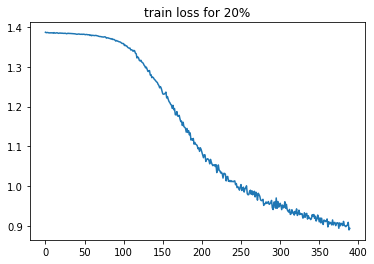

In [ ]:
plt.plot(result, label='Train loss')
plt.title("train loss for 20%")
plt.savefig("/content/drive/MyDrive/losscn20%.png")

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in valid_loader:
        model=BiLSTM().cuda()
        model.load_state_dict(torch.load(PATH))
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        total += labels.size(0)
        correct += compare(tr(help1(outputs)),tr(labels))

100 * correct / total

84.12068965517241